![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


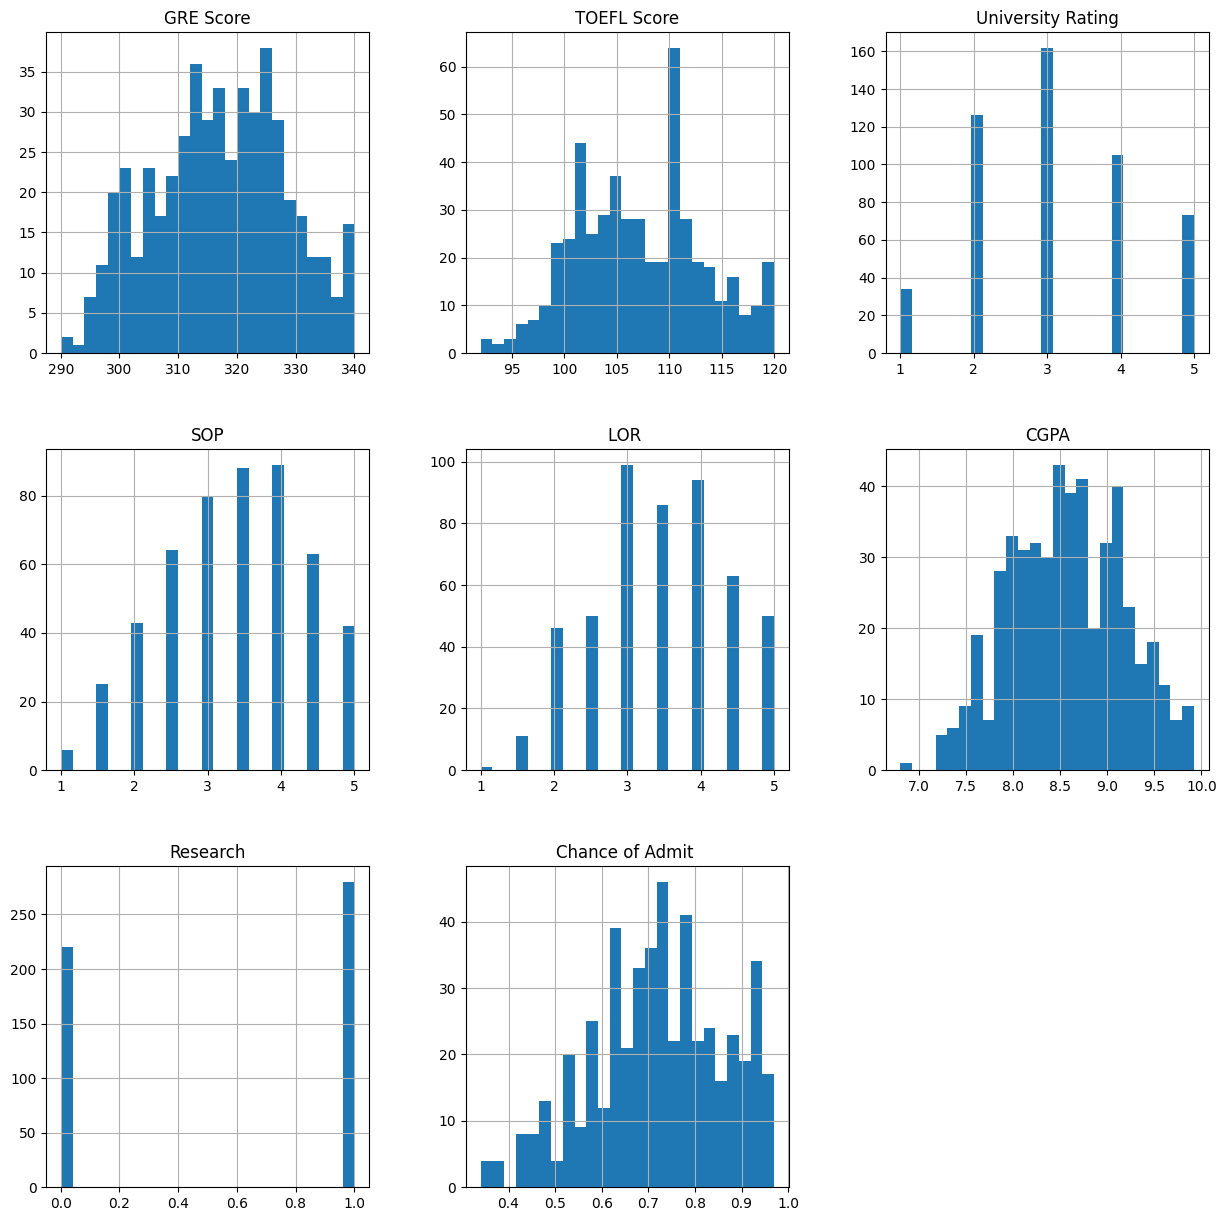

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Inicialmente se verifia la cantidad de variables de salida (o dimensiones) y la cantidad de variables de entrada en los datos.

In [8]:
output_var = yTrain.shape[-1]
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[-1]
print(dims, 'input variables')

350  output variables
7 input variables


El código que se presenta acontinuación, entrena el modelo utilizando el optimizador de descenso de gradiente estocástico (SGD) y la función de pérdida de error cuadrático medio (MSE). También evalua el modelo utilizando las métricas de error absoluto medio (MAE) y error cuadrático medio (MSE) en el conjunto de prueba.

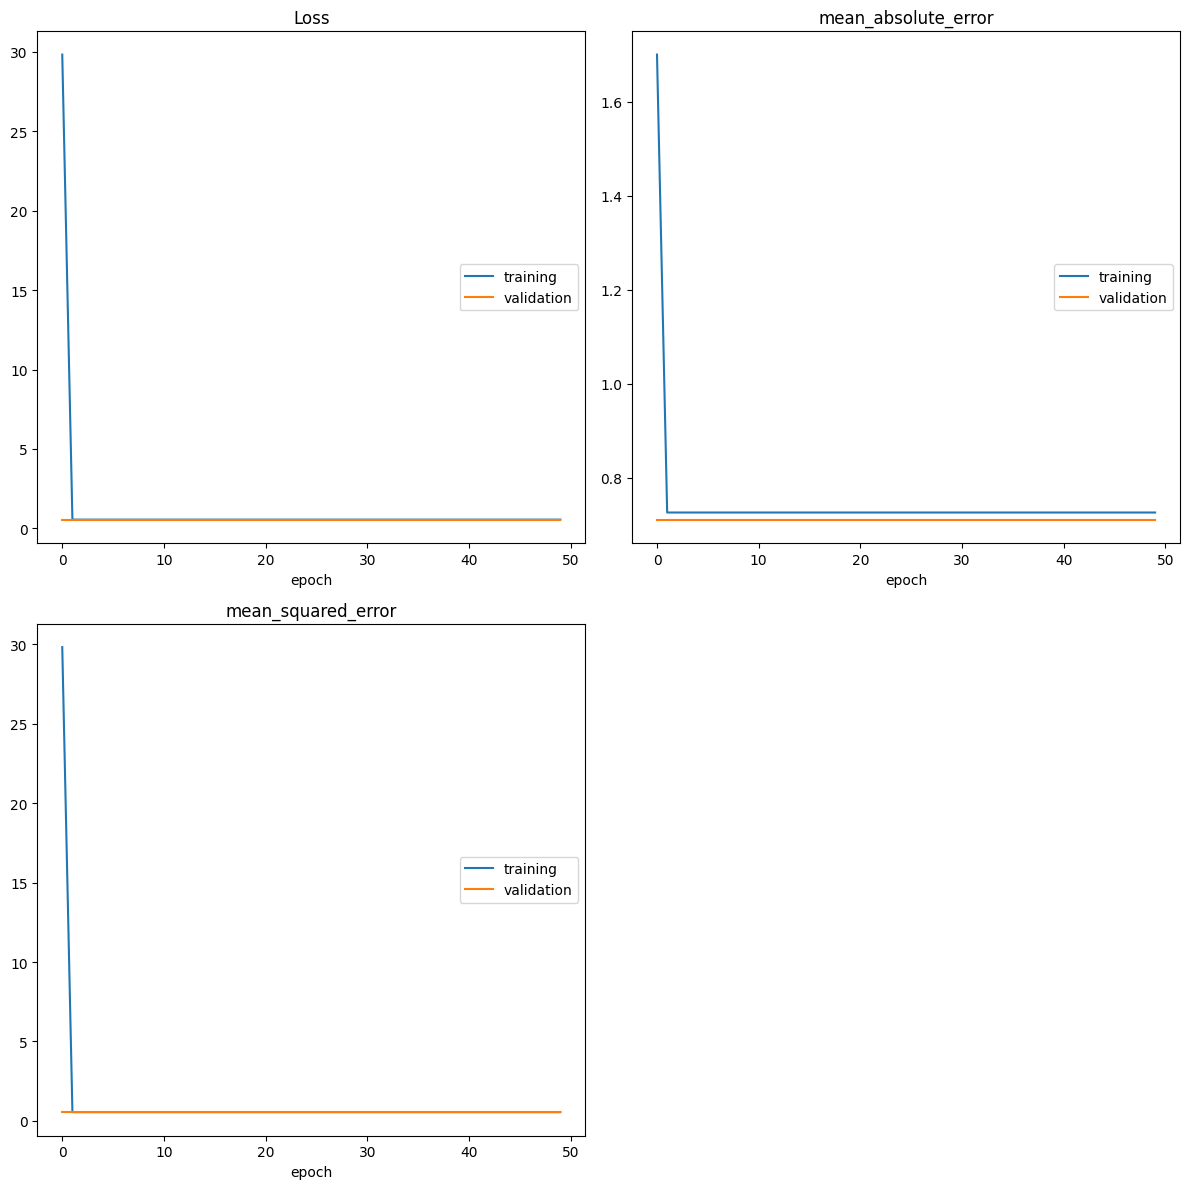

Loss
	training         	 (min:    0.547, max:   29.829, cur:    0.547)
	validation       	 (min:    0.526, max:    0.526, cur:    0.526)
mean_absolute_error
	training         	 (min:    0.726, max:    1.700, cur:    0.726)
	validation       	 (min:    0.711, max:    0.711, cur:    0.711)
mean_squared_error
	training         	 (min:    0.547, max:   29.829, cur:    0.547)
	validation       	 (min:    0.526, max:    0.526, cur:    0.526)
5/5 [==============================] - 0s 3ms/step - loss: 0.5263 - mean_absolute_error: 0.7107 - mean_squared_error: 0.5263
MAE: 0.7106559872627258
MSE: 0.5262534618377686


In [10]:
!pip install livelossplot
from keras import backend as K
from livelossplot import PlotLossesKeras

K.clear_session()

# Definición del modelo de red neuronal de una capa
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,),activation='relu'))

# Compilación del modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Entrenamiento del modelo
model.fit(xTrain, yTrain,
          verbose=1,
          epochs=50,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

# Gráfico de la pérdida del modelo vs número de épocas
y = model.evaluate(xTest, yTest, verbose=1)
print("MAE:", y[1])
print("MSE:", y[2])

Del modelo se tienen los siguientes resultados:

- La pérdida (loss) final en el conjunto de entrenamiento es de 0.547, mientras que en el conjunto de validación es de 0.526.
- El error absoluto medio (MAE) final en el conjunto de entrenamiento es de 0.726, mientras que en el conjunto de validación es de 0.711.
- El error cuadrático medio (MSE) final en el conjunto de entrenamiento es de 0.547, mientras que en el conjunto de validación es de 0.526.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Este código define una red neuronal con dos capas ocultas, cada una con funciones de activación ReLU. En este modelo, se utiliza una función de activación ReLU en la primera capa oculta y se añade una capa adicional de activación ReLU después de la capa de salida. Adicionalmente, se utiliza el optimizador sgd y la función de pérdida de error cuadrático medio (MSE). Se entrena el modelo durante 50 épocas y se evalua su rendimiento utilizando las métricas MAE y MSE en el conjunto de prueba.

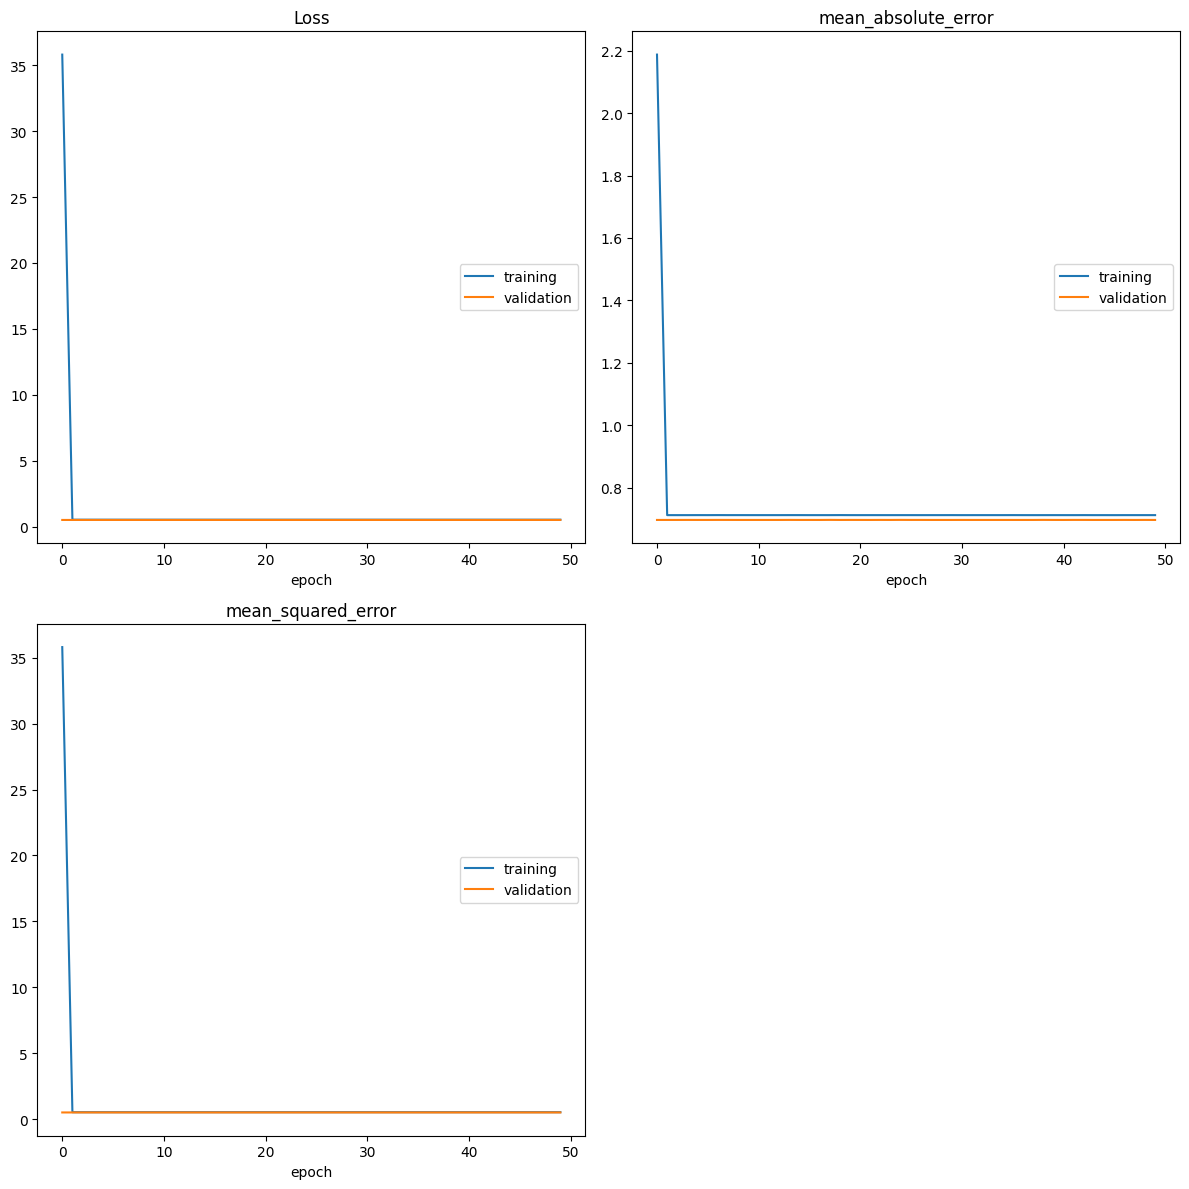

Loss
	training         	 (min:    0.535, max:   35.799, cur:    0.535)
	validation       	 (min:    0.515, max:    0.515, cur:    0.515)
mean_absolute_error
	training         	 (min:    0.712, max:    2.187, cur:    0.712)
	validation       	 (min:    0.697, max:    0.697, cur:    0.697)
mean_squared_error
	training         	 (min:    0.535, max:   35.799, cur:    0.535)
	validation       	 (min:    0.515, max:    0.515, cur:    0.515)
5/5 [==============================] - 0s 7ms/step - loss: 0.5146 - mean_absolute_error: 0.6968 - mean_squared_error: 0.5146
MAE: 0.6968191266059875
MSE: 0.5146496295928955


In [11]:
# Celda 2
from keras.layers import Activation

K.clear_session()

# Definición del modelo de red neuronal de dos capas
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Compilación del modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Entrenamiento del modelo
model.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=50,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Evaluación del modelo
y1 = model.evaluate(xTest, yTest, verbose=1)
print("MAE:", y1[1])
print("MSE:", y1[2])

Esta red neuronal tiene una arquitectura más compleja que la anterior, lo que permite capturar relaciones más complejas en los datos:

- La pérdida (loss) final en el conjunto de entrenamiento es de 0.535, mientras que en el conjunto de validación es de 0.515.
- El error absoluto medio (MAE) final en el conjunto de entrenamiento es de 0.712, mientras que en el conjunto de validación es de 0.697.
- El error cuadrático medio (MSE) final en el conjunto de entrenamiento es de 0.535, mientras que en el conjunto de validación es de 0.515.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Este código define una red neuronal con más de una capa oculta y utiliza Dropout para regularizar el modelo y evitar el sobreajuste. También utiliza Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación deja de disminuir. Entrenamos el modelo durante 50 épocas y evaluamos su rendimiento utilizando las métricas MAE y MSE en el conjunto de prueba.

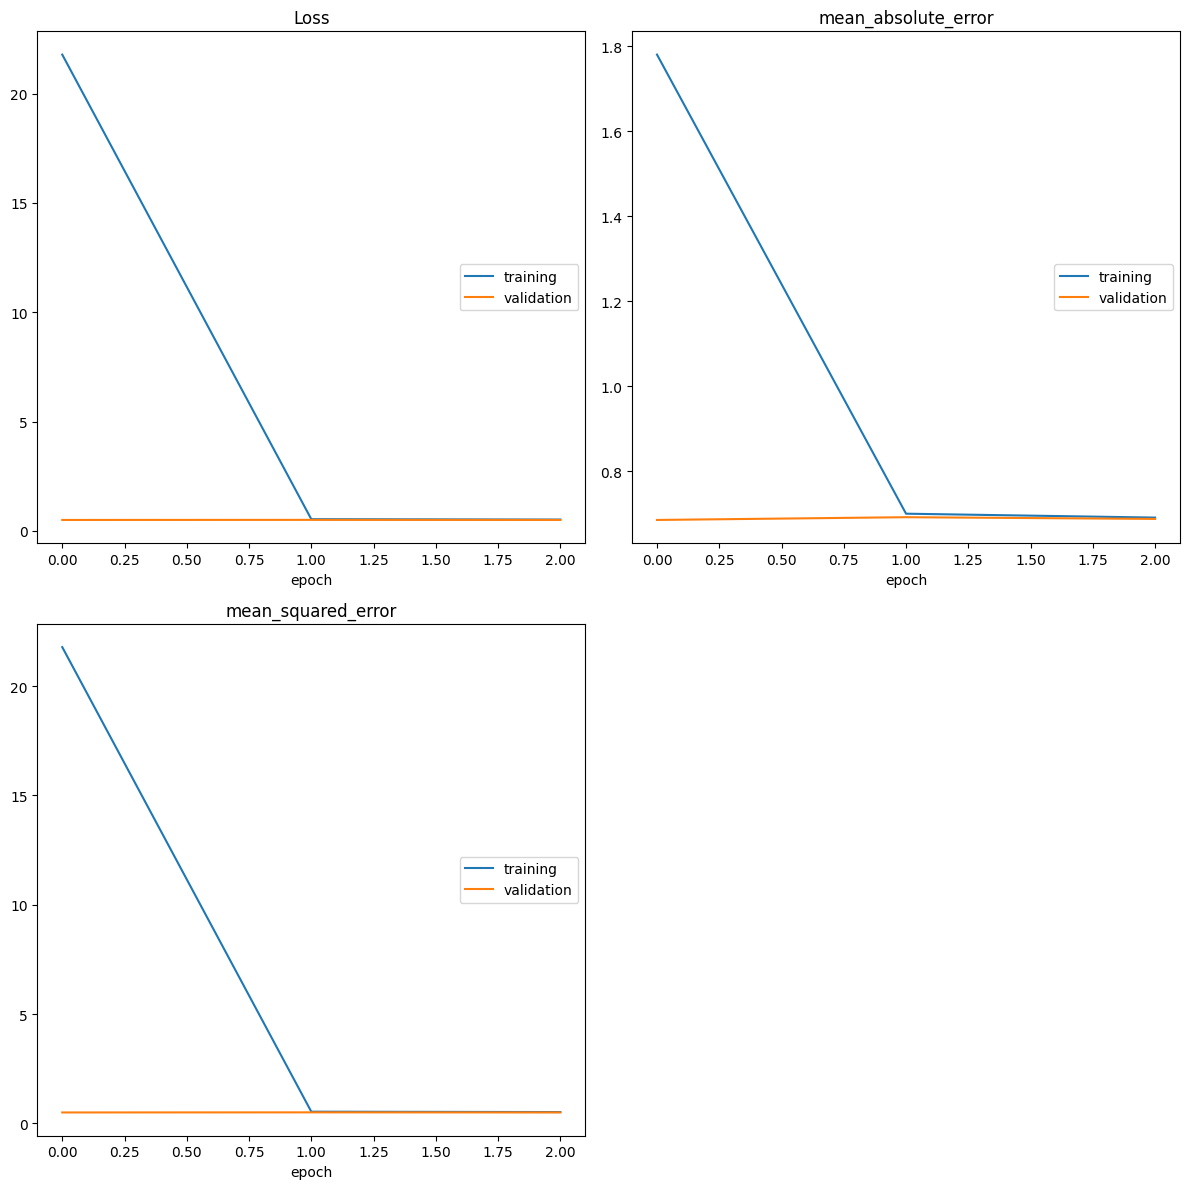

Loss
	training         	 (min:    0.519, max:   21.782, cur:    0.519)
	validation       	 (min:    0.501, max:    0.505, cur:    0.501)
mean_absolute_error
	training         	 (min:    0.691, max:    1.780, cur:    0.691)
	validation       	 (min:    0.686, max:    0.692, cur:    0.688)
mean_squared_error
	training         	 (min:    0.519, max:   21.782, cur:    0.519)
	validation       	 (min:    0.501, max:    0.505, cur:    0.501)
11/11 [==============================] - 2s 200ms/step - loss: 0.5190 - mean_absolute_error: 0.6912 - mean_squared_error: 0.5190 - val_loss: 0.5011 - val_mean_absolute_error: 0.6881 - val_mean_squared_error: 0.5011
Epoch 3: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.5011 - mean_absolute_error: 0.6881 - mean_squared_error: 0.5011
Error Absoluto Medio (MAE): 0.6880796551704407
Error Cuadrático Medio (MSE): 0.5010560750961304


In [12]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint

K.clear_session()

# Definición del modelo de red neuronal con más de una capa
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Compilación del modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento del modelo
model.fit(xTrain, yTrain,
          verbose=1,
          epochs=50,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

# Evaluación del modelo
y2 = model.evaluate(xTest, yTest, verbose=1)

print("Error Absoluto Medio (MAE):", y2[1])
print("Error Cuadrático Medio (MSE):", y2[2])


Del modelo se tienen los siguientes resultados:

- La pérdida (loss) final en el conjunto de entrenamiento es de 0.519, mientras que en el conjunto de validación es de 0.501.
- El error absoluto medio (MAE) final en el conjunto de entrenamiento es de 0.691, mientras que en el conjunto de validación es de 0.688.
- El error cuadrático medio (MSE) final en el conjunto de entrenamiento es de 0.519, mientras que en el conjunto de validación es de 0.501.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

El código que se proporciona crea un gráfico de barras que muestra el MAE de cada modelo, con etiquetas indicando el valor exacto de MAE sobre cada barra. Además, resalta en rojo la barra correspondiente al modelo con el menor MAE.

Con esta visualización, es fácil ver que el modelo de tres capas con Early Stopping y Dropout tiene el menor MAE, lo que lo convierte en el modelo preferido en términos de precisión.

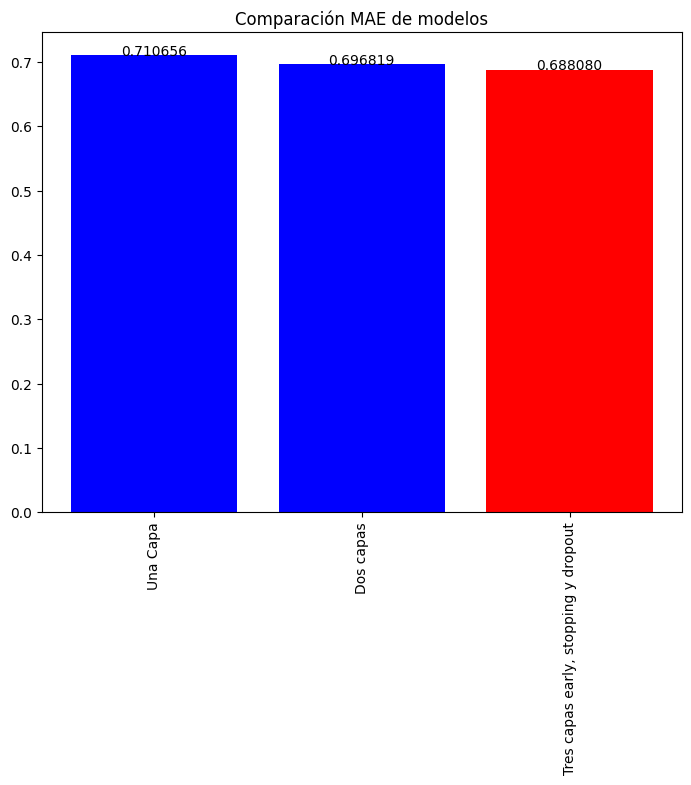

In [13]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Comparación MAE de modelos")
ejeX = ['Una Capa', 'Dos capas', 'Tres capas early, stopping y dropout']
ejeY = [y[1], y1[1], y2[1]]

min_rmse_index = ejeY.index(min(ejeY))

colors = ['blue' if i != min_rmse_index else 'red' for i in range(len(ejeY))]

ax.bar(ejeX, ejeY, color=colors)

def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f"{y[i]:.6f}", ha='center')

addlabels(ejeX, ejeY, plt)

plt.xticks(rotation=90)
plt.show()


La métrica MAE para cada modelo es:

1. **Red Neuronal de una Capa:** ~0.7107
2. **Red Neuronal Multicapa (Celda 2):** ~0.6968
3. **Red Neuronal Multicapa (Celda 3):** ~0.6881

Al igual que en la visualización anterior, se presenta la siguiente, donde las barras de colores nos muestran rápidamente qué modelo tiene el menor MSE, lo que facilita la identificación del modelo con el mejor rendimiento en términos de esta métrica.

En este caso, al igual que con la métrica MAE, el modelo de tres capas con Early Stopping y Dropout tiene el menor MSE, lo que lo convierte en el modelo preferido en términos de precisión.

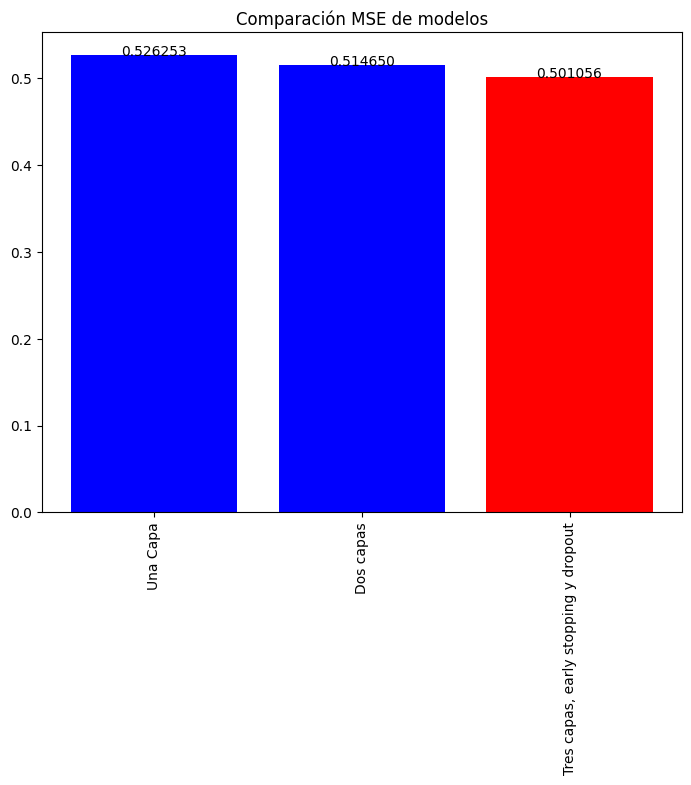

In [14]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Comparación MSE de modelos")
ejeX = ['Una Capa', 'Dos capas', 'Tres capas, early stopping y dropout']
ejeY = [y[2], y1[2], y2[2]]

min_rmse_index = ejeY.index(min(ejeY))

colors = ['blue' if i != min_rmse_index else 'red' for i in range(len(ejeY))]

ax.bar(ejeX, ejeY, color=colors)

def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f"{y[i]:.6f}", ha='center')

addlabels(ejeX, ejeY, plt)

plt.xticks(rotation=90)
plt.show()


La métrica MSE para cada modelo es:

1. **Red Neuronal de una Capa:** ~0.5263
2. **Red Neuronal Multicapa (Celda 2):** ~0.5146
3. **Red Neuronal Multicapa (Celda 3):** ~0.5011

Análisis de estos resultados:

- **Red Neuronal de una Capa:**
  - **Ventajas:** Es un modelo simple y fácil de entrenar. Puede ser útil para conjuntos de datos más pequeños o menos complejos.
  - **Desventajas:** Puede tener un rendimiento limitado en problemas más complejos debido a la falta de capacidad para capturar relaciones no lineales en los datos.

- **Red Neuronal Multicapa (Celda 2):**
  - **Ventajas:** Introduce una arquitectura más compleja con dos capas ocultas, lo que puede permitir capturar relaciones más complejas en los datos.
  - **Desventajas:** Aunque mejora ligeramente el rendimiento en comparación con la red de una capa, aún puede no ser lo suficientemente flexible para algunos conjuntos de datos más complejos.

- **Red Neuronal Multicapa (Celda 3):**
  - **Ventajas:** Incorpora técnicas de regularización como Dropout y utiliza una arquitectura más profunda, lo que puede ayudar a mejorar la generalización y el rendimiento del modelo.
  - **Desventajas:** Puede ser más lento de entrenar debido a la mayor complejidad de la red.

En general, el mejor modelo sería el de la **Celda 3**, ya que tiene la menor MAE y MSE, lo que indica un mejor rendimiento en la predicción de la probabilidad de admisión de los estudiantes. Además, utiliza técnicas de regularización que ayudan a prevenir el sobreajuste. Sin embargo, el modelo de la **Celda 2** también es una opción sólida con un rendimiento similar y una arquitectura más simple. Por otro lado, el modelo de la **Celda 1** muestra un rendimiento ligeramente inferior, lo que sugiere que su capacidad para capturar las relaciones en los datos podría ser limitada en comparación con los otros dos modelos.